In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# load the data from csv file to Pandas DataFrame
titanic_data = pd.read_csv('titanic_train.csv')

In [4]:
# printing the first 5 rows of the dataframe
titanic_data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [5]:
# number of rows and Columns
titanic_data.shape

(850, 15)

In [6]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [7]:
# check the number of missing values in each column
titanic_data.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [8]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='cabin', axis=1)

In [9]:
# replacing the missing values in "Age" column with mean value
titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True)

In [10]:
# finding the mode value of "Embarked" column
print(titanic_data['embarked'].mode())

0    S
dtype: object


In [11]:
print(titanic_data['embarked'].mode()[0])

S


In [12]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)

In [13]:
# check the number of missing values in each column
titanic_data.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              1
embarked          0
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [14]:
titanic_data = titanic_data.drop(columns= 'boat', axis=1)


In [15]:
titanic_data = titanic_data.drop(columns= 'body', axis=1)

In [16]:
titanic_data = titanic_data.drop(columns= 'home.dest', axis=1)

In [17]:
# check the number of missing values in each column
titanic_data.isnull().sum()

passenger_id    0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
embarked        0
survived        0
dtype: int64

In [18]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   embarked      850 non-null    object 
 10  survived      850 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 73.2+ KB


In [19]:
# replacing the missing values in "fare" column with mean value
titanic_data['fare'].fillna(titanic_data['fare'].mean(), inplace=True)

In [20]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          850 non-null    float64
 9   embarked      850 non-null    object 
 10  survived      850 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 73.2+ KB


In [21]:
# number of rows and Columns
titanic_data.shape

(850, 11)

In [22]:
# finding the number of people survived and not survived
titanic_data['survived'].value_counts()

0    537
1    313
Name: survived, dtype: int64

In [23]:
sns.set()

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

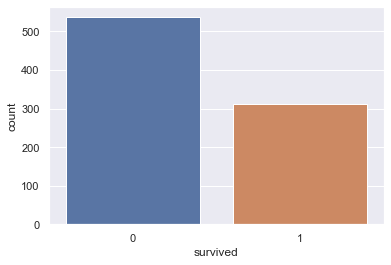

In [24]:
# making a count plot for "Survived" column
sns.countplot('survived', data=titanic_data)

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

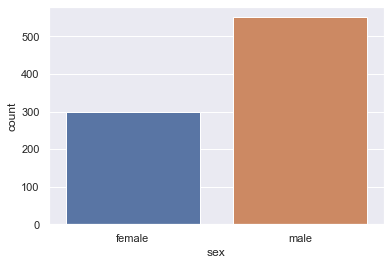

In [25]:
# making a count plot for "Sex" column
sns.countplot('sex', data=titanic_data)

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

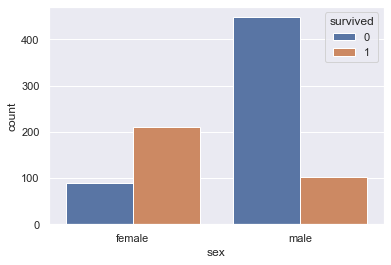

In [26]:
# number of survivors Gender wise
sns.countplot('sex', hue='survived', data=titanic_data)

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

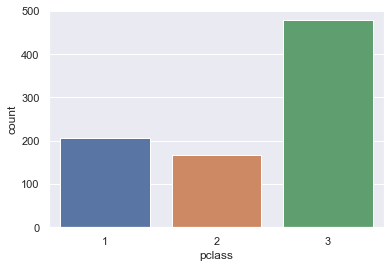

In [27]:
# making a count plot for "Pclass" column
sns.countplot('pclass', data=titanic_data)

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

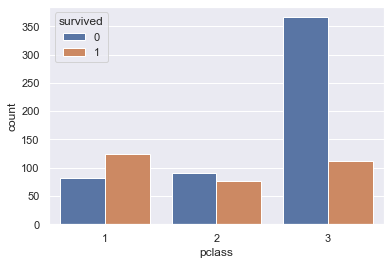

In [28]:
sns.countplot('pclass', hue='survived', data=titanic_data)

In [29]:
titanic_data['sex'].value_counts()

male      551
female    299
Name: sex, dtype: int64

In [30]:
# converting categorical Columns

titanic_data.replace({'sex':{'male':0,'female':1}, 'embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [31]:
X = titanic_data.drop(columns = ['passenger_id','name','ticket','survived'],axis=1)
Y = titanic_data['survived']

In [32]:
print(X)

     pclass  sex        age  sibsp  parch     fare  embarked
0         3    1  29.519847      0      0   7.7333         2
1         3    0  38.000000      0      0   8.6625         0
2         3    1  30.000000      1      1  24.1500         0
3         2    1  54.000000      1      3  23.0000         0
4         2    0  40.000000      0      0  13.0000         0
..      ...  ...        ...    ...    ...      ...       ...
845       1    0  55.000000      0      0  50.0000         0
846       1    0  58.000000      0      0  29.7000         1
847       2    1  24.000000      1      0  26.0000         0
848       3    1   3.000000      1      1  13.7750         0
849       2    0  52.000000      0      0  13.0000         0

[850 rows x 7 columns]


In [33]:
print(Y)

0      1
1      0
2      0
3      1
4      0
      ..
845    0
846    0
847    1
848    0
849    0
Name: survived, Length: 850, dtype: int64


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(850, 7) (680, 7) (170, 7)


In [36]:
model = LogisticRegression()

In [37]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

In [38]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [39]:
print(X_train_prediction)

[1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1
 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1
 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1
 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 

In [40]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.7955882352941176


In [41]:
d = pd.read_csv('titanic_test.csv')
d

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,295,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,B,NaN,"Haverford, PA"
1,1150,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN,NaN
2,89,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,NaN,NaN,"Montreal, PQ"
3,1063,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S,NaN,NaN,"Finland Sudbury, ON"
4,1020,3,"Minkoff, Mr. Lazar",male,21.0,0,0,349211,7.8958,NaN,S,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,1194,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S,NaN,NaN,NaN
455,403,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.0000,NaN,S,NaN,NaN,"England / Detroit, MI"
456,108,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C,4,NaN,NaN
457,510,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,NaN,S,NaN,NaN,"Halesworth, England"


In [42]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  459 non-null    int64  
 1   pclass        459 non-null    int64  
 2   name          459 non-null    object 
 3   sex           459 non-null    object 
 4   age           370 non-null    float64
 5   sibsp         459 non-null    int64  
 6   parch         459 non-null    int64  
 7   ticket        459 non-null    object 
 8   fare          459 non-null    float64
 9   cabin         104 non-null    object 
 10  embarked      458 non-null    object 
 11  boat          178 non-null    object 
 12  body          48 non-null     float64
 13  home.dest     281 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 50.3+ KB


In [43]:
# check the number of missing values in each column
d.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age              89
sibsp             0
parch             0
ticket            0
fare              0
cabin           355
embarked          1
boat            281
body            411
home.dest       178
dtype: int64

In [44]:
# drop the "Cabin" column from the dataframe
d = d.drop(columns='cabin', axis=1)

In [45]:
d = d.drop(columns='boat', axis=1)

In [46]:
d = d.drop(columns='body', axis=1)

In [47]:
d = d.drop(columns='home.dest', axis=1)

In [48]:
d.isnull().sum()

passenger_id     0
pclass           0
name             0
sex              0
age             89
sibsp            0
parch            0
ticket           0
fare             0
embarked         1
dtype: int64

In [49]:
# replacing the missing values in "Age" column with mean value
d['age'].fillna(d['age'].mean(), inplace=True)

In [50]:
# replacing the missing values in "Embarked" column with mode value
d['embarked'].fillna(d['embarked'].mode()[0], inplace=True)

In [51]:
# check the number of missing values in each column
d.isnull().sum()

passenger_id    0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
embarked        0
dtype: int64

In [53]:
# converting categorical Columns

d.replace({'sex':{'male':0,'female':1}, 'embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [54]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [55]:
print(X_test_prediction)

[0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1
 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1]


In [56]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7705882352941177
